In [1]:
pip install eikon

In [2]:
import pandas as pd
import eikon as ek
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter
import pylab
from statsmodels.stats.stattools import jarque_bera

In [3]:
ek.set_app_key('c3a74828ecd04fdaa09f2ce333cc2f486834d9fa')

# Downloading the data and running initial analysis

In [4]:
ts=ek.get_timeseries(['BTC=','ETH=','LTC=','XRP=','BCH=','EUR=','CHF=','GBP=','JPY=','CNY=','XAU=',
                    'XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX'], 
                     start_date="2019-03-31", 
                     end_date="2021-04-30", 
                     fields='CLOSE',
                     interval='monthly')
display(ts)

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,1291.9000,15.1350,1383.5000,845.5000,68.39,11241.19,2834.3998,7378.771,7279.19,259.29
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,1283.3500,14.9350,1388.0000,886.0000,72.80,11735.16,2945.8309,7781.456,7418.22,265.93
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,1305.2500,14.5700,1325.0000,791.5000,64.49,11544.54,2752.0629,7127.956,7161.71,248.15
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,1409.1000,15.3075,1538.0000,833.0000,66.55,11977.38,2941.7606,7671.075,7425.63,266.00
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,1413.5500,16.2550,1516.5000,859.5000,65.17,12064.45,2980.3789,7848.780,7586.78,268.64
2019-08-31,9487.80,166.57,62.49,0.25446,273.20,1.0989,0.9899,1.2156,106.29,7.1543,1519.8500,18.3500,1531.2500,930.7500,60.43,12060.92,2926.4581,7690.998,7207.18,264.03
2019-09-30,8260.00,176.92,55.47,0.25285,225.83,1.0898,0.9978,1.2287,108.06,7.1477,1472.0000,16.9950,1674.5050,882.0000,60.78,12233.13,2976.7373,7749.449,7408.21,269.17
2019-10-31,9190.79,181.45,58.35,0.29447,282.47,1.1150,0.9863,1.2940,108.02,7.0379,1513.1600,18.1250,1794.0649,932.0000,60.23,12337.05,3037.5644,8083.832,7248.38,270.46
2019-11-30,7544.95,150.88,47.57,0.22466,216.41,1.1015,0.9998,1.2933,109.51,7.0308,1463.9000,17.0200,1841.1949,900.0200,62.43,12676.11,3140.9806,8403.685,7346.53,280.51


In [5]:
ts.shape

(26, 20)

In [6]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2019-03-31 to 2021-04-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC=    26 non-null     float64
 1   ETH=    26 non-null     float64
 2   LTC=    26 non-null     float64
 3   XRP=    26 non-null     float64
 4   BCH=    26 non-null     float64
 5   EUR=    26 non-null     float64
 6   CHF=    26 non-null     float64
 7   GBP=    26 non-null     float64
 8   JPY=    26 non-null     float64
 9   CNY=    26 non-null     float64
 10  XAU=    26 non-null     float64
 11  XAG=    26 non-null     float64
 12  XPD=    26 non-null     float64
 13  XPT=    26 non-null     float64
 14  LCOc1   26 non-null     float64
 15  .SSHI   26 non-null     float64
 16  .SP500  26 non-null     float64
 17  .NDX    26 non-null     float64
 18  .FTSE   26 non-null     float64
 19  .DJX    26 non-null     float64
dtypes: float64(20)
memory usage: 4.3 KB


In [7]:
ts.describe()

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
count,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,16158.06500,510.891538,85.207308,0.350330,327.631538,1.141946,0.953535,1.297788,107.502308,6.847085,1636.855527,19.864600,2029.194746,924.769950,53.831538,12462.372308,3232.687038,9841.539077,6689.082308,275.399615
std,15184.14938,638.312983,54.438682,0.276158,160.567437,0.042858,0.039317,0.052673,2.057500,0.230546,210.069897,4.612435,426.489800,125.665297,13.764535,735.808598,400.495744,2194.670847,659.598343,26.392534
min,4165.60000,128.240000,39.120000,0.175790,168.910000,1.089800,0.885100,1.215600,103.240000,6.425000,1283.350000,13.970000,1325.000000,722.166200,22.740000,11241.190000,2584.590800,7127.956000,5577.270000,219.170000
25%,8532.71000,177.782500,49.545000,0.226975,230.337500,1.107875,0.914150,1.260175,105.990000,6.696725,1482.290000,16.356625,1704.394975,846.375000,43.795000,11981.642500,2947.929100,7822.319250,6099.885000,260.475000
50%,9497.86000,230.425000,61.535000,0.254400,278.420000,1.121600,0.962100,1.294050,107.900000,6.893000,1634.952450,18.078150,2025.506600,894.169650,59.195000,12372.220000,3120.632850,8996.010500,6647.120000,268.905000
75%,13300.11750,421.265000,107.787500,0.377815,367.055000,1.176250,0.989000,1.330550,108.552500,7.036125,1779.753500,24.185000,2314.096700,961.000000,65.000000,12862.617500,3465.981125,11937.539250,7284.305000,285.110000
max,58950.02000,2765.210000,266.530000,1.575720,989.200000,1.221300,1.019000,1.393200,111.410000,7.154300,1974.690000,28.220000,2934.500000,1198.500000,72.800000,14179.110000,4181.174900,13860.760000,7586.780000,338.750000


In [8]:
ts['BTC=']

Date
2019-03-31     4165.60
2019-04-30     5236.75
2019-05-31     8498.91
2019-06-30    11383.54
2019-07-31    10028.68
2019-08-31     9487.80
2019-09-30     8260.00
2019-10-31     9190.79
2019-11-30     7544.95
2019-12-31     7157.75
2020-01-31     9383.80
2020-02-29     8634.11
2020-03-31     6474.10
2020-04-30     8822.59
2020-05-31     9507.92
2020-06-30     9144.25
2020-07-31    11340.25
2020-08-31    11680.47
2020-09-30    10711.50
2020-10-31    13840.00
2020-11-30    19376.24
2020-12-31    28987.60
2021-01-31    32321.40
2021-02-28    43177.77
2021-03-31    58950.02
2021-04-30    56802.90
Name: BTC=, dtype: float64

In [9]:
for col in ts.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=ts[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingBTC=
plottingETH=
plottingLTC=
plottingXRP=
plottingBCH=
plottingEUR=
plottingCHF=
plottingGBP=
plottingJPY=
plottingCNY=
plottingXAU=
plottingXAG=
plottingXPD=
plottingXPT=
plottingLCOc1
plotting.SSHI
plotting.SP500
plotting.NDX
plotting.FTSE
plotting.DJX


<Figure size 720x432 with 0 Axes>

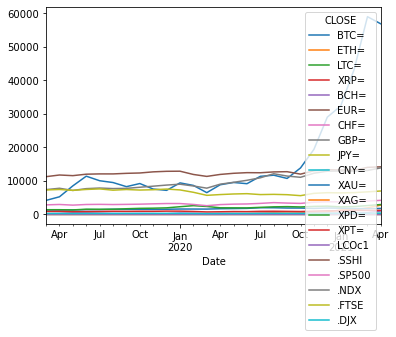

In [10]:
plt.figure(figsize=(10, 6))
ts.plot()
plt.show()

# Normality tests

In [15]:
#Histograms for each individual series  

df=pd.DataFrame(ts)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram'+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()

histogramBTC=
histogramETH=
histogramLTC=
histogramXRP=
histogramBCH=
histogramEUR=
histogramCHF=
histogramGBP=
histogramJPY=
histogramCNY=
histogramXAU=
histogramXAG=
histogramXPD=
histogramXPT=
histogramLCOc1
histogram.SSHI
histogram.SP500
histogram.NDX
histogram.FTSE
histogram.DJX


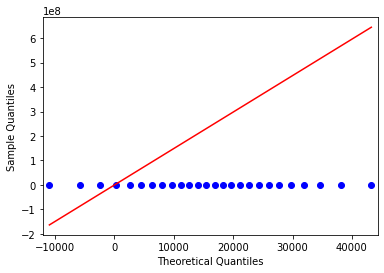

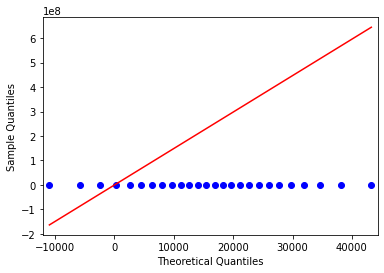

In [16]:
#Q-Q Plot for  BTC

BTC=df['BTC=']

mean1=statistics.mean(BTC) 
st_dev1=statistics.stdev(BTC)
obs_count1=len(BTC)

sm.qqplot(BTC, loc = mean1, scale = st_dev1, line='s')

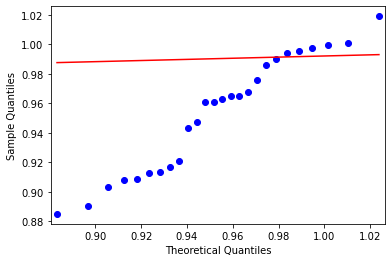

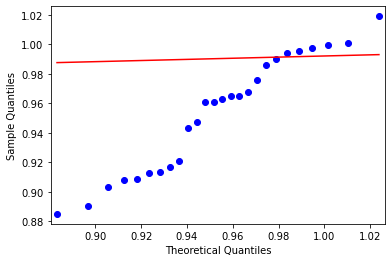

In [17]:
#Q-Q Plot for Swiss franc

CHF=df['CHF=']

mean1=statistics.mean(CHF) 
st_dev1=statistics.stdev(CHF)
obs_count1=len(CHF)

sm.qqplot(CHF, loc = mean1, scale = st_dev1, line='s')

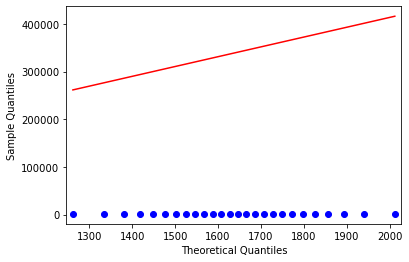

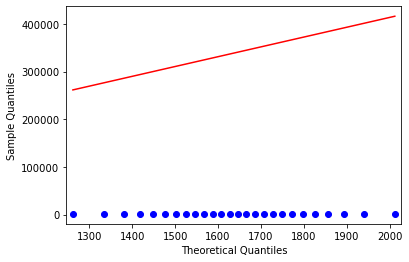

In [18]:
#Q-Q Plot for Gold

XAU=df['XAU=']

mean1=statistics.mean(XAU) 
st_dev1=statistics.stdev(XAU)
obs_count1=len(XAU)

sm.qqplot(XAU, loc = mean1, scale = st_dev1, line='s')

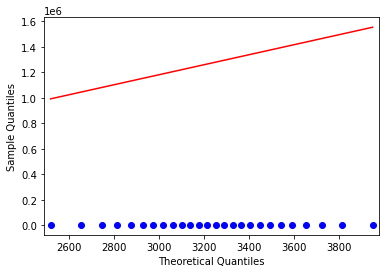

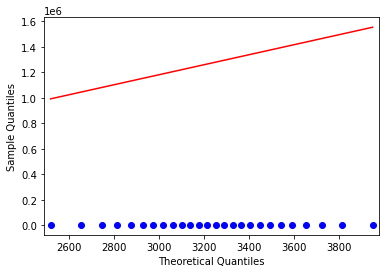

In [19]:
#Q-Q Plot for SP&500

SP500=df['.SP500']

mean1=statistics.mean(SP500) 
st_dev1=statistics.stdev(SP500)
obs_count1=len(SP500)

sm.qqplot(SP500, loc = mean1, scale = st_dev1, line='s')

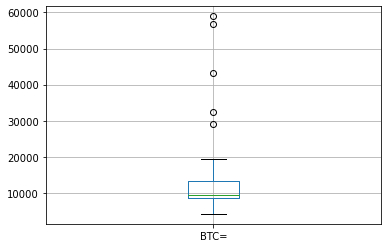

In [20]:
#boxplot for Bitcoin

boxplot1=df.boxplot(column=['BTC='])
plt.show()

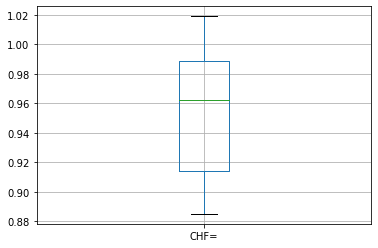

In [21]:
#boxplot for Swiss Franc

boxplot1=df.boxplot(column=['CHF='])
plt.show()

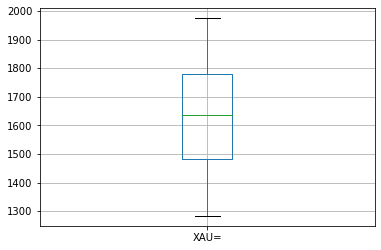

In [22]:
#boxplot for Gold 

boxplot1=df.boxplot(column=['XAU='])
plt.show()

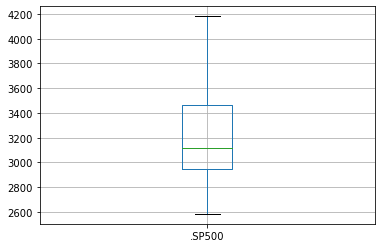

In [23]:
#boxplot for SP&500

boxplot1=df.boxplot(column=['.SP500'])
plt.show()

In [24]:
#Shapiro-Wilk Normality Test for Bitcoin

stat,p=sp.stats.shapiro(BTC)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
1.6578488839513739e-06
Sample does not look Gaussian (reject H0)


In [25]:
#Shapiro-Wilk Normality Test for Swiss franc

stat,p=sp.stats.shapiro(CHF)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.10511621087789536
Sample looks Gaussian (fail to reject H0)


In [26]:
#Shapiro-Wilk Normality Test for Gold

stat,p=sp.stats.shapiro(XAU)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.32188931107521057
Sample looks Gaussian (fail to reject H0)


In [27]:
#Shapiro-Wilk Normality Test for SP&500

stat,p=sp.stats.shapiro(SP500)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.086578369140625
Sample looks Gaussian (fail to reject H0)


Skew: 1.8903462832454339
Mean: 16158.065000000002
Median: 9497.86


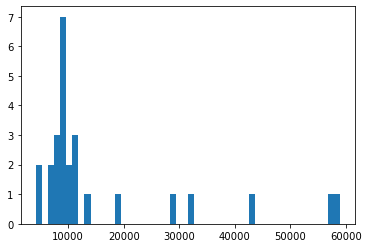

In [28]:
# Mean, Median and Skewness for Bitcoin

print('Skew:',stats.skew(BTC))
print('Mean:', np.mean(BTC))
print('Median:', np.median(BTC))

plt.hist(BTC, 50);

In [29]:
#Calculating kurtosis for Bitcoin
print("Excess kurtosis of returns: ", stats.kurtosis(BTC))

Excess kurtosis of returns:  2.317254741369866


Skew: -0.19334532871545138
Mean: 0.9535346153846155
Median: 0.9621


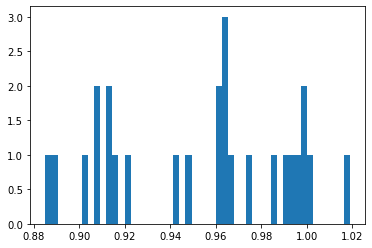

In [30]:
# Mean, Median and Skewness for Swiss Franc

print('Skew:',stats.skew(CHF))
print('Mean:', np.mean(CHF))
print('Median:', np.median(CHF))

plt.hist(CHF, 50);

In [31]:
#Calculating kurtosis for Swiss Franc
print("Excess kurtosis of returns: ", stats.kurtosis(CHF))

Excess kurtosis of returns:  -1.2341672290531627


Skew: -0.08138293918163983
Mean: 1636.8555269230767
Median: 1634.95245


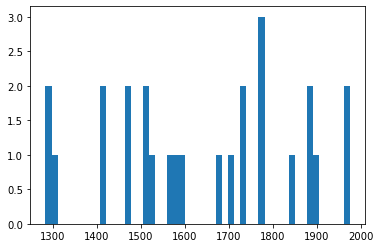

In [32]:
# Mean, Median and Skewness for Gold

print('Skew:',stats.skew(XAU))
print('Mean:', np.mean(XAU))
print('Median:', np.median(XAU))

plt.hist(XAU, 50);

In [33]:
#Calculating kurtosis for Gold
print("Excess kurtosis of returns: ", stats.kurtosis(XAU))

Excess kurtosis of returns:  -1.086068802286317


Skew: 0.7365769389183064
Mean: 3232.687038461539
Median: 3120.63285


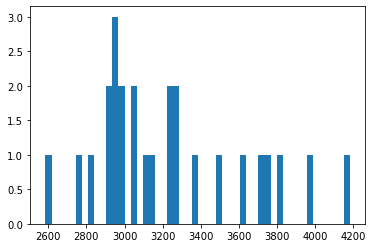

In [34]:
# Mean, Median and Skewness for SP&500

print('Skew:',stats.skew(SP500))
print('Mean:', np.mean(SP500))
print('Median:', np.median(SP500))

plt.hist(SP500, 50);

In [35]:
#Calculating kurtosis for SP&500
print("Excess kurtosis of returns: ", stats.kurtosis(SP500))

Excess kurtosis of returns:  -0.2765975630893034


In [36]:
#Normality Testing using Jarque-Bera 
#Test Calibration

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print ((num_significant) / N)

0.056


In [37]:
#Jarque-Bera for BTC

_, pvalue, _, _ = jarque_bera(BTC)

if pvalue > 0.05:
    print ('The BTC Closing Prices are likely normal.')
else:
    print ('The BTC Closing Prices are likely not normal.')

The BTC Closing Prices are likely not normal.


#This tells us that the BTC Closing Prices likely do not follow a normal distribution.

In [57]:
#Normality Testing using Jarque-Bera for Swiss Franc
_, pvalue, _, _ = jarque_bera(CHF)

if pvalue > 0.05:
    print ('The BTC Closing Prices are likely normal.')
else:
    print ('The BTC Closing Prices are likely not normal.')

The BTC Closing Prices are likely normal.


In [58]:
#Normality Testing using Jarque-Bera for Gold
_, pvalue, _, _ = jarque_bera(XAU)

if pvalue > 0.05:
    print ('The BTC Closing Prices are likely normal.')
else:
    print ('The BTC Closing Prices are likely not normal.')

The BTC Closing Prices are likely normal.


In [59]:
#Normality Testing using Jarque-Bera for SP&500
_, pvalue, _, _ = jarque_bera(SP500)

if pvalue > 0.05:
    print ('The BTC Closing Prices are likely normal.')
else:
    print ('The BTC Closing Prices are likely not normal.')

The BTC Closing Prices are likely normal.


# Dividing the data in four subperiods

In [42]:
sample_1=ts[0:7]
sample_2=ts[7:13] 
sample_3=ts[13:19] 
sample_4=ts[19:26] 


In [43]:
sample_1

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,1291.90,15.1350,1383.500,845.50,68.39,11241.19,2834.3998,7378.771,7279.19,259.29
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,1283.35,14.9350,1388.000,886.00,72.80,11735.16,2945.8309,7781.456,7418.22,265.93
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,1305.25,14.5700,1325.000,791.50,64.49,11544.54,2752.0629,7127.956,7161.71,248.15
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,1409.10,15.3075,1538.000,833.00,66.55,11977.38,2941.7606,7671.075,7425.63,266.00
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,1413.55,16.2550,1516.500,859.50,65.17,12064.45,2980.3789,7848.780,7586.78,268.64
2019-08-31,9487.80,166.57,62.49,0.25446,273.20,1.0989,0.9899,1.2156,106.29,7.1543,1519.85,18.3500,1531.250,930.75,60.43,12060.92,2926.4581,7690.998,7207.18,264.03
2019-09-30,8260.00,176.92,55.47,0.25285,225.83,1.0898,0.9978,1.2287,108.06,7.1477,1472.00,16.9950,1674.505,882.00,60.78,12233.13,2976.7373,7749.449,7408.21,269.17


In [44]:
sample_2

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-10-31,9190.79,181.45,58.35,0.29447,282.47,1.1150,0.9863,1.2940,108.02,7.0379,1513.1600,18.1250,1794.0649,932.0000,60.23,12337.05,3037.5644,8083.832,7248.38,270.46
2019-11-30,7544.95,150.88,47.57,0.22466,216.41,1.1015,0.9998,1.2933,109.51,7.0308,1463.9000,17.0200,1841.1949,900.0200,62.43,12676.11,3140.9806,8403.685,7346.53,280.51
2019-12-31,7157.75,128.24,41.15,0.19025,202.92,1.1210,0.9678,1.3259,108.61,6.9618,1517.0100,17.8300,1941.5000,962.5000,66.00,12837.50,3230.7820,8733.073,7542.44,285.38
2020-01-31,9383.80,180.37,67.90,0.23850,375.06,1.1093,0.9630,1.3199,108.38,6.9364,1589.8149,18.0313,2278.0400,956.5000,58.16,12870.99,3225.5163,8991.512,7286.01,282.56
2020-02-29,8634.11,223.57,58.69,0.23392,309.46,1.1025,0.9653,1.2820,108.07,6.9906,1584.7400,16.6615,2593.1921,863.5950,50.52,11897.75,2954.2237,8461.834,6580.61,254.09
2020-03-31,6474.10,134.35,39.12,0.17768,221.92,1.1029,0.9608,1.2418,107.53,7.0808,1571.0500,13.9700,2351.5200,722.1662,22.74,11319.54,2584.5908,7813.499,5671.96,219.17


In [45]:
sample_3

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2020-04-30,8822.59,211.53,47.07,0.21459,254.27,1.0955,0.9652,1.2592,107.17,7.0600,1680.0900,15.02,1959.9331,772.1862,25.27,11905.85,2912.4305,9000.509,5901.21,243.46
2020-05-31,9507.92,235.46,46.50,0.20791,243.77,1.1098,0.9612,1.2344,107.77,7.1348,1726.3000,17.84,1944.5000,838.2500,35.33,12246.05,3044.3052,9555.525,6076.60,253.83
2020-06-30,9144.25,225.39,41.12,0.17579,221.70,1.1231,0.9471,1.2399,107.92,7.0651,1780.6650,18.13,1930.0000,816.6080,41.15,12436.03,3100.2851,10156.852,6169.74,258.13
2020-07-31,11340.25,345.58,58.33,0.25434,302.25,1.1774,0.9127,1.3088,105.88,6.9744,1974.6900,24.37,2091.0801,907.0000,43.30,12407.39,3271.1249,10905.881,5897.76,264.28
2020-08-31,11680.47,432.57,60.88,0.28019,274.37,1.1936,0.9035,1.3369,105.89,6.8474,1969.7500,28.22,2243.0977,929.5859,45.28,12658.85,3500.3085,12110.698,5963.57,284.30
2020-09-30,10711.50,356.65,45.83,0.23900,225.86,1.1718,0.9207,1.2916,105.45,6.7896,1885.4399,23.21,2304.8528,888.3193,40.95,12724.65,3362.9990,11418.063,5866.10,277.82


In [46]:
sample_4

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2020-10-31,13840.00,387.35,55.91,0.24016,262.99,1.1647,0.9167,1.2941,104.64,6.6919,1877.9500,23.6300,2212.0000,849.0000,37.46,11994.43,3269.9591,11052.946,5577.27,265.02
2020-11-30,19376.24,605.47,86.54,0.64757,313.94,1.1928,0.9090,1.3321,104.27,6.5760,1777.0190,22.6044,2372.8130,964.8914,47.59,13003.41,3621.6334,12268.316,6266.19,296.39
2020-12-31,28987.60,738.87,124.07,0.22464,343.04,1.2213,0.8851,1.3673,103.24,6.5250,1896.4875,26.3584,2447.6599,1065.9478,51.80,13327.88,3756.0715,12888.284,6460.52,306.06
2021-01-31,32321.40,1290.53,126.38,0.45563,392.72,1.2136,0.8903,1.3702,104.68,6.4250,1846.0900,27.0015,2226.0405,1072.6758,55.88,13192.93,3714.2427,12925.376,6407.46,299.83
2021-02-28,43177.77,1329.46,156.02,0.39801,437.68,1.2074,0.9082,1.3932,106.58,6.4730,1733.4900,26.6200,2317.1780,1188.7222,66.13,13134.38,3811.1497,12909.443,6483.43,309.32
2021-03-31,58950.02,1939.87,195.70,0.56430,535.81,1.1728,0.9434,1.3779,110.70,6.5518,1707.0074,24.3900,2619.1414,1187.3009,63.54,14015.01,3972.8922,13091.443,6713.63,329.82
2021-04-30,56802.90,2765.21,266.53,1.57572,989.20,1.2018,0.9133,1.3814,109.27,6.4730,1768.5900,25.9000,2934.5000,1198.5000,67.25,14179.11,4181.1749,13860.760,6969.81,338.75


In [47]:
def nans(shape, dtype=float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

In [48]:
subsample_list=['AVERAGE CLOSING PRICE','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([20,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [49]:
#desc_stat_table['Statistic'][0]= 'Real Mean Dividend Yield'
desc_stat_table.iloc[0, 0]= 'BTC='
desc_stat_table.iloc[1, 0]= 'ETH='
desc_stat_table.iloc[2, 0]= 'LTC='
desc_stat_table.iloc[3, 0]= 'XRP='
desc_stat_table.iloc[4, 0]= 'BCH='
desc_stat_table.iloc[5, 0]= 'EUR='
desc_stat_table.iloc[6, 0]= 'CHF='
desc_stat_table.iloc[7, 0]= 'GBP='
desc_stat_table.iloc[8, 0]= 'JPY='
desc_stat_table.iloc[9, 0]= 'CNY='
desc_stat_table.iloc[10, 0]= 'XAU='
desc_stat_table.iloc[11, 0]= 'XAG='
desc_stat_table.iloc[12, 0]= 'XPD='
desc_stat_table.iloc[13, 0]= 'XPT='
desc_stat_table.iloc[14, 0]= 'LCoc1='
desc_stat_table.iloc[15, 0]= '.SSHI='
desc_stat_table.iloc[16, 0]= '.SP500='
desc_stat_table.iloc[17, 0]= '.NDX='
desc_stat_table.iloc[18, 0]= '.FTSE='
desc_stat_table.iloc[19, 0]= '.DJX='

In [50]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.average(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round(np.average(b['ETH=']),3)
    desc_stat_table.iloc[2, a] = round(np.average(b['LTC=']),3)
    desc_stat_table.iloc[3, a] = round(np.average(b['XRP=']),3)
    desc_stat_table.iloc[4, a] = round(np.average(b['BCH=']),3)
    desc_stat_table.iloc[5, a] = round(np.average(b['EUR=']),3)
    desc_stat_table.iloc[6, a] = round(np.average(b['CHF=']),3)
    desc_stat_table.iloc[7, a] = round(np.average(b['GBP=']),3)
    desc_stat_table.iloc[8, a] = round(np.average(b['JPY=']),3)
    desc_stat_table.iloc[9, a] = round(np.average(b['CNY=']),3)
    desc_stat_table.iloc[10, a] = round(np.average(b['XAU=']),3)
    desc_stat_table.iloc[11, a] = round(np.average(b['XAG=']),3)
    desc_stat_table.iloc[12, a] = round(np.average(b['XPD=']),3)
    desc_stat_table.iloc[13, a] = round(np.average(b['XPT=']),3)
    desc_stat_table.iloc[14, a] = round(np.average(b['LCOc1']),3)
    desc_stat_table.iloc[15, a] = round(np.average(b['.SSHI']),3)
    desc_stat_table.iloc[16, a] = round(np.average(b['.SP500']),3)
    desc_stat_table.iloc[17, a] = round(np.average(b['.NDX']),3)
    desc_stat_table.iloc[18, a] = round(np.average(b['.FTSE']),3)
    desc_stat_table.iloc[19, a] = round(np.average(b['.DJX']),3)
    a=a+1

desc_stat_table

,AVERAGE CLOSING PRICE,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC=,8151.611,8064.250,10201.163,36207.990
1,ETH=,202.911,166.477,301.197,1293.823
2,LTC=,84.533,52.130,49.955,144.450
3,XRP=,0.324,0.227,0.229,0.587
4,BCH=,301.797,268.040,253.703,467.911
5,EUR=,1.113,1.109,1.145,1.196
6,CHF=,0.996,0.974,0.935,0.909
7,GBP=,1.257,1.293,1.278,1.359
8,JPY=,108.783,108.353,106.680,106.197
9,CNY=,6.914,7.006,6.979,6.531


In [51]:
subsample_list=['STD CLOSING PRICE','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([20,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [52]:
#desc_stat_table['Statistic'][0]= 'Real Mean Dividend Yield'
desc_stat_table.iloc[0, 0]= 'BTC='
desc_stat_table.iloc[1, 0]= 'ETH='
desc_stat_table.iloc[2, 0]= 'LTC='
desc_stat_table.iloc[3, 0]= 'XRP='
desc_stat_table.iloc[4, 0]= 'BCH='
desc_stat_table.iloc[5, 0]= 'EUR='
desc_stat_table.iloc[6, 0]= 'CHF='
desc_stat_table.iloc[7, 0]= 'GBP='
desc_stat_table.iloc[8, 0]= 'JPY='
desc_stat_table.iloc[9, 0]= 'CNY='
desc_stat_table.iloc[10, 0]= 'XAU='
desc_stat_table.iloc[11, 0]= 'XAG='
desc_stat_table.iloc[12, 0]= 'XPD='
desc_stat_table.iloc[13, 0]= 'XPT='
desc_stat_table.iloc[14, 0]= 'LCoc1='
desc_stat_table.iloc[15, 0]= '.SSHI='
desc_stat_table.iloc[16, 0]= '.SP500='
desc_stat_table.iloc[17, 0]= '.NDX='
desc_stat_table.iloc[18, 0]= '.FTSE='
desc_stat_table.iloc[19, 0]= '.DJX='

In [53]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.std(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round(np.std(b['ETH=']),3)
    desc_stat_table.iloc[2, a] = round(np.std(b['LTC=']),3)
    desc_stat_table.iloc[3, a] = round(np.std(b['XRP=']),3)
    desc_stat_table.iloc[4, a] = round(np.std(b['BCH=']),3)
    desc_stat_table.iloc[5, a] = round(np.std(b['EUR=']),3)
    desc_stat_table.iloc[6, a] = round(np.std(b['CHF=']),3)
    desc_stat_table.iloc[7, a] = round(np.std(b['GBP=']),3)
    desc_stat_table.iloc[8, a] = round(np.std(b['JPY=']),3)
    desc_stat_table.iloc[9, a] = round(np.std(b['CNY=']),3)
    desc_stat_table.iloc[10, a] = round(np.std(b['XAU=']),3)
    desc_stat_table.iloc[11, a] = round(np.std(b['XAG=']),3)
    desc_stat_table.iloc[12, a] = round(np.std(b['XPD=']),3)
    desc_stat_table.iloc[13, a] = round(np.std(b['XPT=']),3)
    desc_stat_table.iloc[14, a] = round(np.std(b['LCOc1']),3)
    desc_stat_table.iloc[15, a] = round(np.std(b['.SSHI']),3)
    desc_stat_table.iloc[16, a] = round(np.std(b['.SP500']),3)
    desc_stat_table.iloc[17, a] = round(np.std(b['.NDX']),3)
    desc_stat_table.iloc[18, a] = round(np.std(b['.FTSE']),3)
    desc_stat_table.iloc[19, a] = round(np.std(b['.DJX']),3)
    a=a+1
    
    
desc_stat_table

,STD CLOSING PRICE,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC=,2398.548,1076.649,1098.820,16216.405
1,ETH=,55.721,32.696,82.069,773.409
2,LTC=,26.599,10.336,7.128,65.026
3,XRP=,0.064,0.038,0.034,0.429
4,BCH=,90.017,61.115,27.935,228.102
5,EUR=,0.015,0.007,0.037,0.019
6,CHF=,0.012,0.014,0.024,0.018
7,GBP=,0.035,0.028,0.037,0.032
8,JPY=,1.646,0.616,0.978,2.593
9,CNY=,0.164,0.049,0.123,0.081
